# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exercise Set 4</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Reinforce principles of groundwater flow to wells; apply method of images to represent boundaries
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  
<hr>

# Exercise 4-1 (*Problem ?? pp. ??*)
The Theis (Eqn. 5.12, p. 162) and Cooper-Jacob (Eqn. 5.54 p. 180) equations can both be used to estimate drawdown for confined aquifer transient problems. A fully penetrating pumping well flows at 300 gpm in a confined aquifer with
transmissivity of 11,500 gpd/ft and storage coefficient of 0.00043.

The two models are:
1. Theis: $s(r,t) = \frac{Q_w}{4 \pi T}W(u)$
2. Cooper-Jacob: $s(r,t) = \frac{Q_w}{4 \pi T}[-0.5772-ln(u)]$

where $u=\frac{r^2 S}{4 T t}$

Determine:
1. The drawdown at an observation well 125 ft from the pumping well at 3 hr after pumping started using the Theis solution.
2. The drawdown at an observation well 125 ft from the pumping well at 3 hr after pumping started using the Cooper-Jacob simplification.
3. For this distance of 125 ft, at what time value in hours does u=0.01?

<hr>

In [75]:
# Build Computation Tools:

def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def ddn_theis(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

def ddn_jacob(radius,time,storage,transmissivity,discharge): # Drawdown function using jacob approximation
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*(-0.5772 - math.log(u))
    return(s)


In [4]:
# Part 1
radius = 125
transmissivity = 11500 # gpd/ft (need to convert to ft^2/day)
transmissivity = transmissivity*(1/7.485) # gpd/7.48g/ft3/ft ->ft^3/day/ft -> ft^2/day! yay! 
storage = 0.00043
discharge = 300 #gpm, convert to ft^3/day
discharge = discharge*(1/7.485)*(1440) # gpm/7.48g/ft3 -> ft3/min*1440min/day -> ft3/day
time = 3/24
# all units should be consistent so use the functions
theis = ddn_theis(radius,time,storage,transmissivity,discharge)
print("Drawdown by Theis Solution")
print("Distance to Pumping Well:",round(radius,2)," feet")
print("Pumping Duration:",round(time,2)," days")
print("Transmissivity:",round(transmissivity,2)," sq.ft./day")
print("Storativity:",round(storage,6))
print("Pump Rate",round(discharge,2)," cu.ft./day")
print("Drawdown at Observation Well:",round(theis,2)," feet")

Drawdown by Theis Solution
Distance to Pumping Well: 125  feet
Pumping Duration: 0.12  days
Transmissivity: 1536.41  sq.ft./day
Storativity: 0.00043
Pump Rate 57715.43  cu.ft./day
Drawdown at Observation Well: 12.47  feet


In [5]:
# Part 2
radius = 125
transmissivity = 11500 # gpd/ft (need to convert to ft^2/day)
transmissivity = transmissivity*(1/7.485) # gpd/7.48g/ft3/ft ->ft^3/day/ft -> ft^2/day! yay! 
storage = 0.00043
discharge = 300 #gpm, convert to ft^3/day
discharge = discharge*(1/7.485)*(1440) # gpm/7.48g/ft3 -> ft3/min*1440min/day -> ft3/day
time = 3/24
# all units should be consistent so use the functions
jacob = ddn_jacob(radius,time,storage,transmissivity,discharge)
print("Drawdown by Jacob Approximation")
print("Distance to Pumping Well:",round(radius,2)," feet")
print("Pumping Duration:",round(time,2)," days")
print("Transmissivity:",round(transmissivity,2)," sq.ft./day")
print("Storativity:",round(storage,6))
print("Pump Rate",round(discharge,2)," cu.ft./day")
print("Drawdown at Observation Well:",round(jacob,2)," feet")

Drawdown by Jacob Approximation
Distance to Pumping Well: 125  feet
Pumping Duration: 0.12  days
Transmissivity: 1536.41  sq.ft./day
Storativity: 0.00043
Pump Rate 57715.43  cu.ft./day
Drawdown at Observation Well: 12.44  feet


In [29]:
# Part 3
# Code up the formula then trial-error to fund time that makes u = 0.01
# Or use bisection, quasi-newton, secant ... search methods.  Trial-error probably fastest in terms of human time
# Or use algebra

# By dumbassedry trial-error
time = 0.109326  #guess this value
u = ((radius**2)*(storage))/(4*transmissivity*time)
print("For time:",round(time,6)," value of u is:",round(u,3))

For time: 0.109326  value of u is: 0.01


In [30]:
# using algerbra
target = 0.01
time = ((radius**2)*(storage))/(target*4*transmissivity)
print("For time:",round(time,6)," value of u is:",round(target,3))

For time: 0.109326  value of u is: 0.01


# Exercise 4-2 (*Problem ?? pp. ??*)
Show how variations in $T$ and $S$ affect transient drawdown curves in an ideal confined aquifer at r = 1, 5, 10, 15, 30, 60, 90, and 120 m when Q = 10 $\frac{L}{sec}$ and t = 400 min. 

Determine:
1. For $S=5 \times 10^{-4}$ , plot drawdown vs. r for $T=1.0 \times 10^{-1}$ , $1.0 \times 10^{-2}$ , and $1.0 \times 10^{-3}$ $\frac{m^2}{sec}$ on one graph.
2. For $T=1.0 \times 10^{-2}$ $\frac{m^2}{sec}$, plot drawdown vs. r for $S=5 \times 10^{-3}$ , $5 \times 10^{-4}$ , and $5 \times 10^{-5}$ on one graph.
3. Summarize your findings into a narrative form (e.g. use words)

<hr>

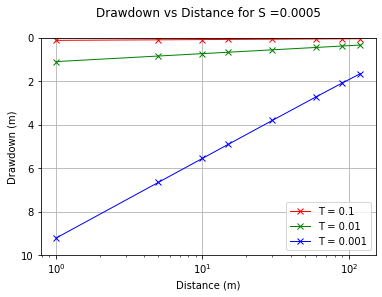

In [175]:
# Use scripts above, but add some graphics
ttime = 400 # minutes 
ttime = 400*60 # convert to seconds

data = \
[[ttime,1],
[ttime ,5],
[ttime ,10],
[ttime ,15],
[ttime ,30],
[ttime ,60],
[ttime ,90],
[ttime ,120]]
S1 = 0.005 # given
S2 = 0.0005
S3 = 0.00005
T1 = 0.1 # given
T2 = 0.01
T3 = 0.001
QLPS = 10 # given
QCMS = QLPS/1000 # convert to LPS to CMS
ddn1 = [0 for i in range(len(data))]
ddn2 = [0 for i in range(len(data))]
ddn3 = [0 for i in range(len(data))]
time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
#print("Time(days)|Radius(ft)|Drawdown(ft)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn1[irow] = ddn_theis(distance[irow],time[irow],S2,T1,QCMS)
    ddn2[irow] = ddn_theis(distance[irow],time[irow],S2,T2,QCMS)
    ddn3[irow] = ddn_theis(distance[irow],time[irow],S2,T3,QCMS)
#    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn3[irow],2)))

# import the package
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(distance, ddn1, c='red', marker='x',linewidth=1) # basic line plot
plot1.plot(distance, ddn2, c='green', marker='x',linewidth=1) # basic line plot
plot1.plot(distance, ddn3, c='blue', marker='x',linewidth=1) # basic line plot
#plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,10])
plot1.invert_yaxis()
plot1.set_xlabel('Distance (m)') # label the x-axis
plot1.set_ylabel('Drawdown (m)') # label the y-axis, notice the LaTex markup
plot1.legend(['T = 0.1','T = 0.01','T = 0.001']) # legend for each series
plot1.set_title('Drawdown vs Distance for S =' + str(round(S2,5))+ '\n') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

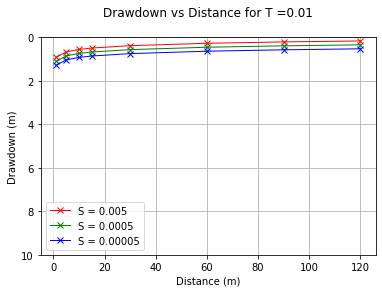

In [84]:
# Use scripts above, but add some graphics
ttime = 400 # minutes 
ttime = 400*60 # convert to seconds

data = \
[[ttime,1],
[ttime ,5],
[ttime ,10],
[ttime ,15],
[ttime ,30],
[ttime ,60],
[ttime ,90],
[ttime ,120]]
S1 = 0.005 # given
S2 = 0.0005
S3 = 0.00005
T1 = 0.1 # given
T2 = 0.01
T3 = 0.001
QLPS = 10 # given
QCMS = QLPS/1000 # convert to LPS to CMS
ddn1 = [0 for i in range(len(data))]
ddn2 = [0 for i in range(len(data))]
ddn3 = [0 for i in range(len(data))]
time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
#print("Time(days)|Radius(ft)|Drawdown(ft)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn1[irow] = ddn_theis(distance[irow],time[irow],S1,T2,QCMS)
    ddn2[irow] = ddn_theis(distance[irow],time[irow],S2,T2,QCMS)
    ddn3[irow] = ddn_theis(distance[irow],time[irow],S3,T2,QCMS)
#    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn3[irow],2)))

# import the package
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(distance, ddn1, c='red', marker='x',linewidth=1) # basic line plot
plot1.plot(distance, ddn2, c='green', marker='x',linewidth=1) # basic line plot
plot1.plot(distance, ddn3, c='blue', marker='x',linewidth=1) # basic line plot
#plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,10])
plot1.invert_yaxis()
plot1.set_xlabel('Distance (m)') # label the x-axis
plot1.set_ylabel('Drawdown (m)') # label the y-axis, notice the LaTex markup
plot1.legend(['S = 0.005','S = 0.0005','S = 0.00005']) # legend for each series
plot1.set_title('Drawdown vs Distance for T =' + str(round(T2,5))+ '\n') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

Observe plots far less sensitive to changes in S than changes in T, thus estimates for S need only be sort of close, but estimates of T need to be very close to "truth" to design pumping systems that are effective.

# Exercise 4-3 (*Problem ?? pp. ??*)

A single ideal pumping well, with radius of 1.0 ft and flow rate of 155 gpm, exists in an ideal confined
aquifer. The aquifer has a saturated thickness of 82 ft. The pump continues running until equilibrium
conditions are reached. The drawdown at the pumping well is 42 ft, and the drawdown at an observation
well 138 ft away is 7.5 ft.

Determine: 
1. Find the transmissivity in $\frac{ft^2}{d}$ and hydraulic conductivity in $\frac{ft^2}{d}$.
2. Find the radius of influence in feet.

<hr>

In [132]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 7.5
ddn1 = 42.0
r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = [500,600,700,800,900,1000]
for i in range(len(Tguess)):
    model = (QCFS/(2.0*math.pi*Tguess[i]))*math.log(r2/r1)
    print("T_guess: ",Tguess[i],"Target: ",target," Model: ",model," Error: ",target-model)


T_guess:  500 Target:  34.5  Model:  46.76893019769393  Error:  -12.268930197693933
T_guess:  600 Target:  34.5  Model:  38.97410849807827  Error:  -4.474108498078273
T_guess:  700 Target:  34.5  Model:  33.40637871263852  Error:  1.0936212873614792
T_guess:  800 Target:  34.5  Model:  29.230581373558703  Error:  5.269418626441297
T_guess:  900 Target:  34.5  Model:  25.98273899871885  Error:  8.517261001281149
T_guess:  1000 Target:  34.5  Model:  23.384465098846967  Error:  11.115534901153033


So T is somewhere between 600 and 700, refine the search:

In [133]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 7.5
ddn1 = 42.0
r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = [600,620,640,660,680,700]
for i in range(len(Tguess)):
    model = (QCFS/(2.0*math.pi*Tguess[i]))*math.log(r2/r1)
    print("T_guess: ",Tguess[i],"Target: ",target," Model: ",model," Error: ",target-model)


T_guess:  600 Target:  34.5  Model:  38.97410849807827  Error:  -4.474108498078273
T_guess:  620 Target:  34.5  Model:  37.71687919168865  Error:  -3.2168791916886477
T_guess:  640 Target:  34.5  Model:  36.53822671694838  Error:  -2.0382267169483796
T_guess:  660 Target:  34.5  Model:  35.43100772552571  Error:  -0.9310077255257099
T_guess:  680 Target:  34.5  Model:  34.38891926301024  Error:  0.11108073698976284
T_guess:  700 Target:  34.5  Model:  33.40637871263852  Error:  1.0936212873614792


Refine again!

In [137]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 7.5
ddn1 = 42.0
r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = [677,677.2,677.4,677.6,677.8,678]
for i in range(len(Tguess)):
    model = (QCFS/(2.0*math.pi*Tguess[i]))*math.log(r2/r1)
    print("T_guess: ",Tguess[i],"Target: ",target," Model: ",model," Error: ",target-model)



T_guess:  677 Target:  34.5  Model:  34.54130738382122  Error:  -0.0413073838212199
T_guess:  677.2 Target:  34.5  Model:  34.53110617077224  Error:  -0.031106170772240205
T_guess:  677.4 Target:  34.5  Model:  34.5209109814688  Error:  -0.020910981468801992
T_guess:  677.6 Target:  34.5  Model:  34.51072181057698  Error:  -0.010721810576981738
T_guess:  677.8 Target:  34.5  Model:  34.5005386527692  Error:  -0.0005386527692010645
T_guess:  678 Target:  34.5  Model:  34.49036150272414  Error:  0.009638497275858526
8.265853658536585


Klose enough, declare $T = 677.8 \frac{ft^2}{day}$,$K = 677.8/82 = 8.26 \frac{ft}{day}$

The next part is to find r2 so that ddn2 = 0

In [147]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 0 #looking for r2 tro make this happen
ddn1 = 42.0
#r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = 677.8
r2 = [340,350,360,370,380,390,400,410]
for i in range(len(r2)):
    model = (QCFS/(2.0*math.pi*Tguess))*math.log(r2[i]/r1)
    print("R_guess: ",r2[i],"Target: ",target," Model: ",model," Error: ",target-model)


R_guess:  340 Target:  42.0  Model:  40.814168791642885  Error:  1.185831208357115
R_guess:  350 Target:  42.0  Model:  41.01713898563895  Error:  0.982861014361049
R_guess:  360 Target:  42.0  Model:  41.214390942159824  Error:  0.7856090578401762
R_guess:  370 Target:  42.0  Model:  41.40623804978304  Error:  0.5937619502169582
R_guess:  380 Target:  42.0  Model:  41.59296861980247  Error:  0.40703138019753027
R_guess:  390 Target:  42.0  Model:  41.77484849243411  Error:  0.22515150756589009
R_guess:  400 Target:  42.0  Model:  41.95212331300944  Error:  0.04787668699056269
R_guess:  410 Target:  42.0  Model:  42.12502052706567  Error:  -0.12502052706567213


So between 400 and 410; refine:

In [148]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 0 #looking for r2 tro make this happen
ddn1 = 42.0
#r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = 677.8
r2 = [400,401,402,403,404,405,406,407,408,409,410]
for i in range(len(r2)):
    model = (QCFS/(2.0*math.pi*Tguess))*math.log(r2[i]/r1)
    print("R_guess: ",r2[i],"Target: ",target," Model: ",model," Error: ",target-model)


R_guess:  400 Target:  42.0  Model:  41.95212331300944  Error:  0.04787668699056269
R_guess:  401 Target:  42.0  Model:  41.96960642171606  Error:  0.030393578283941736
R_guess:  402 Target:  42.0  Model:  41.98704598589763  Error:  0.012954014102369626
R_guess:  403 Target:  42.0  Model:  42.004442221924805  Error:  -0.004442221924804812
R_guess:  404 Target:  42.0  Model:  42.02179534455953  Error:  -0.021795344559528473
R_guess:  405 Target:  42.0  Model:  42.039105566970925  Error:  -0.0391055669709246
R_guess:  406 Target:  42.0  Model:  42.05637310075105  Error:  -0.05637310075105262
R_guess:  407 Target:  42.0  Model:  42.073598155930405  Error:  -0.07359815593040508
R_guess:  408 Target:  42.0  Model:  42.09078094099321  Error:  -0.09078094099321277
R_guess:  409 Target:  42.0  Model:  42.107921662892636  Error:  -0.10792166289263605
R_guess:  410 Target:  42.0  Model:  42.12502052706567  Error:  -0.12502052706567213


In [149]:
# Use Theim Solution
# h2-h1 = Q/(2piT)ln(r2/r1)
import math
QGPM = 155 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
ddn2 = 0 #looking for r2 tro make this happen
ddn1 = 42.0
#r2 = 138
r1 = 1
target = ddn1-ddn2 #why -> h1 = ho-ddn1, h2 = ho-ddn2 
Tguess = 677.8
r2 = [402,402.1,402.2,402.3,402.4,402.5,402.6,402.7,402.8,402.9,403]
for i in range(len(r2)):
    model = (QCFS/(2.0*math.pi*Tguess))*math.log(r2[i]/r1)
    print("R_guess: ",r2[i],"Target: ",target," Model: ",model," Error: ",target-model)


R_guess:  402 Target:  42.0  Model:  41.98704598589763  Error:  0.012954014102369626
R_guess:  402.1 Target:  42.0  Model:  41.98878755571117  Error:  0.01121244428883017
R_guess:  402.2 Target:  42.0  Model:  41.990528692459975  Error:  0.009471307540025009
R_guess:  402.3 Target:  42.0  Model:  41.99226939635936  Error:  0.007730603640638378
R_guess:  402.4 Target:  42.0  Model:  41.994009667624496  Error:  0.005990332375503726
R_guess:  402.5 Target:  42.0  Model:  41.99574950647038  Error:  0.004250493529617927
R_guess:  402.6 Target:  42.0  Model:  41.99748891311186  Error:  0.0025110868881412785
R_guess:  402.7 Target:  42.0  Model:  41.99922788776359  Error:  0.000772112236411715
R_guess:  402.8 Target:  42.0  Model:  42.00096643064012  Error:  -0.0009664306401191425
R_guess:  402.9 Target:  42.0  Model:  42.00270454195579  Error:  -0.0027045419557865102
R_guess:  403 Target:  42.0  Model:  42.004442221924805  Error:  -0.004442221924804812


So $r=402.7$ is close enough, thus the anticipaed radius of influence is $R_e = 402.7 ~m$

### Useful References for Problems below:
1. [Fetter and Kreamer (2022) Applied Hydrology 5ed. pp. 212-215](https://arjzaidi.files.wordpress.com/2015/09/unimasr-com_e7ce669a880a8c4c70b4214641f93a02.pdf)
1. [Kelvin's Method of Images for potential flow (MIT fluid flow lecture)](http://web.mit.edu/fluids-modules/www/potential_flows/LecturesHTML/lec1011/node37.html)
3. [Method of Images (Wikipedia)](https://en.wikipedia.org/wiki/Method_of_images)
2. [Carslaw and Jaeger (1959), *Conduction of Heat in Solids, 2ed.* Oxford University Press in particular Chapter 10 pp. 274](http://54.243.252.9/ce-4363-webroot/3-Readings/carslaw-and-jaeger-conduction-of-heat-in-solids-1959isbn-0198533683.pdf)


# Exercise 4-4 (*Problem ?? pp. ??*)

An unconfined aquifer exists where a buried river channel cut into underlying impermeable bedrock.
The figure below shows the orientation and pertinent dimensions. The flow rate at the pumping well is 250
gpm, and its radius of influence is 1000 ft. The hydraulic conductivity of the aquifer is 15 ft/d, and the initial
saturated thickness is 120 ft. Find the drawdown at the observation well under equilibrium conditions.

![](planview-unconfined.png)

<hr>

**Solution**

For any single well:

$s(r,R_{eff})=H_{ref} - \sqrt{[H_{ref}^2 - \frac{Q}{\pi*K}ln(\frac{R_{eff}}{r})]}$

Supoertposition of image wells to complete estimate and reflect boundaries as below:

![](imagewells.png)

A script for the gonculations:


In [173]:
# model
def head_unconf(radius,discharge,conductivity,href,Reff):
    import math
    if radius >= Reff:
        head_unconf = math.sqrt(href**2 - 0)
    else:
        head_unconf = math.sqrt(href**2 - (discharge/(math.pi*conductivity))*math.log(Reff/radius))
    return(head_unconf)
# parameters
K=15 #ft/day
QGPM = 250 # given
QCFS = QGPM*(1/7.485)*(1440) # convert GPM to CFS 
REFF = 1000 #given
HREFF = 120 #given

# ddn from real well
ddn1 = HREFF - head_unconf(160,QCFS,K,HREFF,REFF)
# ddn 1st image 
ddn2 = HREFF - head_unconf(3*160,QCFS,K,HREFF,REFF)
# ddn 2nd image
ddn3 = HREFF - ddn_unconf(5*160,QCFS,K,HREFF,REFF)
# ddn 3rd image
ddn4 = HREFF - ddn_unconf(7*160,QCFS,K,HREFF,REFF)
# ddn 4th image
ddn5 = HREFF - ddn_unconf(9*160,QCFS,K,HREFF,REFF)

ddn_obs=ddn1+ddn2+ddn3+ddn4+ddn5

print("Drawdown at observation well from pumping and boundaries: ",round(ddn_obs,3)," feets")

Drawdown at observation well from pumping and boundaries:  12.18  feets


# Exercise 4-5 (*Problem ?? pp. 216*)

Consider the figure below. Wells 1, 2, and 3 are pumping wells, and Obs 1 and 2 are just observation
wells (no pumping at all). Provide a sketch to scale, drawn with a straightedge, that shows all the proper
image wells (pp. 212-215) necessary to represent the impacts of the two boundaries on the pumping and observation well
drawdowns.

![](image-wells.png)

<hr>

**Solution**

Create the wellfield array:

![](wellfield.png)

**Code the Solution (future exercise)**

In [174]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def ddn_theis(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

# array for observations

# array for pumps

# compute distance 
# radius = sqrt(x1-xo**2 +y1-yo**2) ....

# Exercise 4-6 (CE 5363 students)(*Problem ?? pp. ??*)

A single pumping well, with a flow rate of 250 gpm, fully penetrates a confined aquifer. The aquifer has
a saturated thickness of 110 ft, hydraulic conductivity of 20 ft/d, and storage coefficient of 0.00050. Due to
outcropping of the aquifer, a no-flow zone exists 200 ft east of the pumping well and extends as a straight
line to both north and south. An observation well is located 100 ft south and 120 ft east of the pumping
well. 

Determine:
1. Drawdown in feet at the observation well at time t=1, 5, 10, 20, 30, 40, 60, 80, 100, 120, 240, 480, 600, 720, 840, 960, 1200, and 1440 min after the well is turned on. 
2. Plot the drawdown vs. log time. 
3. Change the boundary type to a constant head boundary and plot the drawdown vs. log time.
4. Combine the two plots into a single graph (both boundary types - same graphic)
3. Summarize your findings in a narrative (e.g. use words).

**Solution**

Use tools above, need geometry

![](imagewelltheory.png)

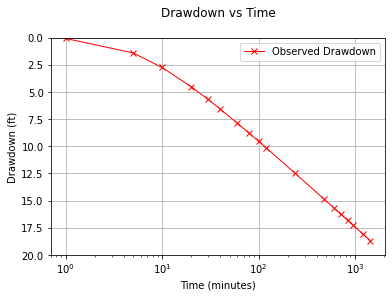

In [21]:
# Build Computation Tools:

def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def ddn_theis(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

import math
QGPM = 250 #given
QCFD = (QGPM/7.48)*1440 #convert gpm to ft^3/day
dpw2obs = math.sqrt(100**2 + 120**2) # pump well to obs
diw2obs = math.sqrt(100**2 + 280**2) # image well to obs
time =[1,5,10,20,30,40,60,80,100,120,240,480,600,720,840,960,1200,1440] # list of times in minuten
for i in range(len(time)):
    time[i]=time[i]/1440.  # convert time into days
K = 20 # hydraulic conductivity in ft/day
b = 110 # aquifer thickness in ft
T = K*b # transmissivity in ft^2/day
S = 0.00050 #given
ddn1 = [0 for i in range(len(time))]
ddnpw = [0 for i in range(len(time))]
ddniw = [0 for i in range(len(time))] # empty vectors to store results
for i in range(len(time)):
    ddnpw[i]=ddn_theis(dpw2obs,time[i],S,T,QCFD)
    ddniw[i]=ddn_theis(diw2obs,time[i],S,T,QCFD)
    ddn1[i]=ddnpw[i]+ddniw[i]
    
#convert time back to minutes
for i in range(len(time)):
    time[i]=time[i]*1440.  # convert time into minutes 
# plot results

# import the package
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(time, ddn1, c='red', marker='x',linewidth=1) # basic line plot
#plot1.plot(time, ddnpw, c='green', marker='x',linewidth=1) # basic line plot
#plot1.plot(time, ddniw, c='blue', marker='x',linewidth=1) # basic line plot
plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,20])
plot1.invert_yaxis()
plot1.set_xlabel('Time (minutes)') # label the x-axis
plot1.set_ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
plot1.legend(['Observed Drawdown','Drawdown from Pumping Well','Drawdown from Image Well']) # legend for each series
plot1.set_title('Drawdown vs Time\n') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

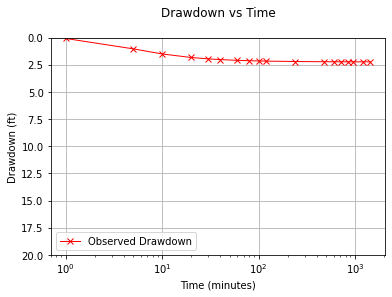

In [22]:
# Build Computation Tools:

def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def ddn_theis(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)
import math
QGPM = 250 #given
QCFD = (QGPM/7.48)*1440 #convert gpm to ft^3/day
dpw2obs = math.sqrt(100**2 + 120**2) # pump well to obs
diw2obs = math.sqrt(100**2 + 280**2) # image well to obs
# To change boundary type change sense of pumping on image well
time =[1,5,10,20,30,40,60,80,100,120,240,480,600,720,840,960,1200,1440] # list of times in minuten
for i in range(len(time)):
    time[i]=time[i]/1440.  # convert time into days
K = 20 # hydraulic conductivity in ft/day
b = 110 # aquifer thickness in ft
T = K*b # transmissivity in ft^2/day
S = 0.00050 #given
ddn2 = [0 for i in range(len(time))]
ddnpw = [0 for i in range(len(time))]
ddniw = [0 for i in range(len(time))] # empty vectors to store results
for i in range(len(time)):
    ddnpw[i]=ddn_theis(dpw2obs,time[i],S,T,QCFD)
    ddniw[i]=ddn_theis(diw2obs,time[i],S,T,-QCFD)###########change is here!
    ddn2[i]=ddnpw[i]+ddniw[i]
    
#convert time back to minutes
for i in range(len(time)):
    time[i]=time[i]*1440.  # convert time into minutes 
# plot results

# import the package
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(time, ddn2, c='red', marker='x',linewidth=1) # basic line plot
#plot1.plot(time, ddnpw, c='green', marker='x',linewidth=1) # basic line plot
#plot1.plot(time, ddniw, c='blue', marker='x',linewidth=1) # basic line plot
plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,20])
plot1.invert_yaxis()
plot1.set_xlabel('Time (minutes)') # label the x-axis
plot1.set_ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
plot1.legend(['Observed Drawdown','Drawdown from Pumping Well','Drawdown from Image Well']) # legend for each series
plot1.set_title('Drawdown vs Time\n') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot

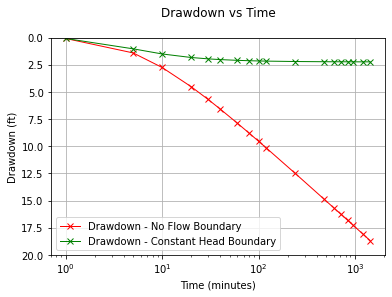

In [24]:
# Now both plots single graph
# import the package
import matplotlib.pyplot as plt
graph, (plot1) = plt.subplots(1, 1) # create a 1X1 plotting frame
# Code adapted from: https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/
plot1.plot(time, ddn1, c='red', marker='x',linewidth=1) # basic line plot
plot1.plot(time, ddn2, c='green', marker='x',linewidth=1) # basic line plot
#plot1.plot(time, ddniw, c='blue', marker='x',linewidth=1) # basic line plot
plot1.set_xscale('log') # set x-axis to display a logarithmic scale #################
plot1.set_ylim([0,20])
plot1.invert_yaxis()
plot1.set_xlabel('Time (minutes)') # label the x-axis
plot1.set_ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
plot1.legend(['Drawdown - No Flow Boundary','Drawdown - Constant Head Boundary','Drawdown from Image Well']) # legend for each series
plot1.set_title('Drawdown vs Time\n') # make a plot title
plot1.grid() # display a grid
plt.show() # display the plot